In [2]:
import os
import cv2
import re
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
def Image_Classification_SVM(svm_kernel, vec, labels,tolerance ): 
    
    '''
    Splitting the data formed into test and split data and training the 
    SVM Classifier.
    '''
    t0 = time.time()
    
    X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2) #train : test = 8:2
    clf = SVC(kernel = svm_kernel,tol=tolerance,random_state=0)    
    #clf = SVC(kernel = svm_kernel,random_state=0) 
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    conf_mat = confusion_matrix(y_test, preds)
    
    t1 = time.time()
    
    return acc*100, conf_mat, (t1-t0)

In [3]:
accuracy_svm = []
timer_svm = []

#for 100 -1000 

K = [100,200,300,400,500,600,700,800,900,1000] #100 - 1000
for k in K:
    print('k:',k)
    label = 'image_label_'+str(k)+'.npy'
    labels=np.load(label)
    labels=labels.tolist()
    v = 'image_vec_'+str(k)+'.npy'
    vec=np.load(v)
    data = Image_Classification_SVM('rbf', vec, labels)
    accuracy_svm.append(data[0])
    conf_mat = data[1]
    timer_svm.append(data[2])
    print('\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0],data[2],data[1]))

k: 100

Accuracy = 70.10785824345146
Time taken = 0.476776123046875 sec
Confusion matrix :
[[42  0  2  0  0  0  0  1  2  1]
 [ 0 58  0  7  0  4  8  0  1  0]
 [ 0  0 60  0  0  2  6  0  0  0]
 [ 0 10  0 28  1  0  2  0  1  0]
 [ 0  0  0  3 33  0  1  3  3  5]
 [ 1 10  7  1  0 55  8  1  0  0]
 [ 1 15  7  5  0  9 51  3  2  0]
 [ 0  0  0  5  4  1  1 44  3  8]
 [ 0  1  0  6  6  1  3  1 39  4]
 [ 4  0  0  0  7  1  0  3  2 45]]
k: 200

Accuracy = 68.7211093990755
Time taken = 0.6253283023834229 sec
Confusion matrix :
[[44  0  1  0  0  0  0  0  2  2]
 [ 0 59  1  1  0  5  9  0  1  0]
 [ 1  0 61  0  0  1  8  0  0  1]
 [ 0 11  0 32  0  2  0  1  2  0]
 [ 0  0  0  6 38  0  0  6  6  5]
 [ 4  8  8  6  0 58 11  1  0  1]
 [ 1 14  7  3  0  7 39  0  1  0]
 [ 0  0  0  2  4  3  1 35  5  2]
 [ 1  3  0  5  4  2  4  2 47  1]
 [ 2  0  0  1  7  0  0  8  2 33]]
k: 300

Accuracy = 69.64560862865947
Time taken = 0.7709658145904541 sec
Confusion matrix :
[[48  0  1  0  0  1  0  1  2  2]
 [ 0 47  1  6  0  5  9  1  0  0

In [5]:
accuracy_svm = []
timer_svm = []
#改tol， random state为0
#for 100 -1000 

K = [100,200,300,400,500,600,700,800,900,1000] #100 - 1000
tol = [1e-1,1e-2,1e-3,1e-4,1e-5]
for t in tol:
    for k in K:
        print('tol:',t)
        print('k:',k)
        label = 'image_label_'+str(k)+'.npy'
        labels=np.load(label)
        labels=labels.tolist()
        v = 'image_vec_'+str(k)+'.npy'
        vec=np.load(v)
        data = Image_Classification_SVM('rbf', vec, labels,t)
        accuracy_svm.append(data[0])
        conf_mat = data[1]
        timer_svm.append(data[2])
        print('\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0],data[2],data[1]))

tol: 0.1
k: 100

Accuracy = 70.26194144838213
Time taken = 0.4494154453277588 sec
Confusion matrix :
[[43  0  1  0  0  1  1  0  0  0]
 [ 0 47  1  5  0  4  8  0  0  0]
 [ 1  0 55  0  0  1  9  0  2  1]
 [ 0  9  0 33  2  1  1  1  2  1]
 [ 1  1  1  3 37  0  0 10  4  2]
 [ 3 13  3  4  0 55  8  0  0  0]
 [ 0  9  5  3  0  9 54  0  3  0]
 [ 0  0  0  1  6  0  3 39  5  5]
 [ 0  4  0  4  2  0  2  8 48  3]
 [ 3  0  1  0  5  0  0  6  1 45]]
tol: 0.1
k: 200

Accuracy = 70.26194144838213
Time taken = 0.5893192291259766 sec
Confusion matrix :
[[49  0  0  0  0  0  1  0  1  3]
 [ 0 51  0  0  0  5  6  0  0  0]
 [ 0  0 67  0  0  3  8  1  0  1]
 [ 0  7  0 33  2  4  1  3  1  0]
 [ 2  1  0  1 38  0  1  1  8  1]
 [ 0 13  7  3  0 42  6  0  1  0]
 [ 0 13 10  3  0  7 42  1  1  0]
 [ 0  0  0  4  5  2  4 43  4  3]
 [ 0  5  0  3  8  1  5  4 51  1]
 [ 0  0  1  0  9  0  0  7  0 40]]
tol: 0.1
k: 300

Accuracy = 70.26194144838213
Time taken = 0.7326736450195312 sec
Confusion matrix :
[[34  0  0  0  0  2  0  0  2  0]
 [


Accuracy = 71.34052388289676
Time taken = 2.22409987449646 sec
Confusion matrix :
[[32  0  2  0  0  0  0  0  1  1]
 [ 0 69  2  5  0  2  6  0  1  0]
 [ 0  0 68  0  0  6  4  1  0  0]
 [ 1 12  0 31  0  0  4  2  1  0]
 [ 2  2  0  4 44  0  1  5  5  2]
 [ 1  6  6  0  0 50 12  0  1  0]
 [ 1 14  1  2  0 12 33  0  2  0]
 [ 0  0  0  3  2  0  2 45  7  2]
 [ 1  2  0  5  8  0  2  5 45  2]
 [ 0  1  2  0  4  1  0  4  3 46]]
tol: 0.001
k: 100

Accuracy = 70.26194144838213
Time taken = 0.47871971130371094 sec
Confusion matrix :
[[47  0  0  0  0  0  0  1  1  1]
 [ 0 54  0  1  0  4  9  1  2  0]
 [ 0  0 58  0  0  1  3  0  0  0]
 [ 0  9  0 38  2  2  2  1  6  0]
 [ 2  1  0  0 33  0  1  5  6  8]
 [ 2  5  5  5  0 54 10  0  1  1]
 [ 0 11  7  2  0 13 43  1  1  1]
 [ 0  0  0  3  2  1  1 35  3  1]
 [ 0  7  0  5  6  0  5  4 42  5]
 [ 1  0  1  0  4  1  0  5  4 52]]
tol: 0.001
k: 200

Accuracy = 67.64252696456087
Time taken = 0.6161994934082031 sec
Confusion matrix :
[[38  0  1  0  0  0  0  0  0  3]
 [ 0 56  0  3  


Accuracy = 70.41602465331279
Time taken = 2.2174057960510254 sec
Confusion matrix :
[[44  0  0  0  0  0  0  0  0  1]
 [ 0 59  0  3  0  7 11  0  2  0]
 [ 0  0 64  0  0  0  8  0  1  0]
 [ 0 14  0 28  1  0  1  2  1  0]
 [ 1  3  0  3 50  1  1  3  6  5]
 [ 0  3  6  1  0 49  7  0  0  0]
 [ 2 14  8  2  0  9 42  2  4  0]
 [ 0  1  0  2  3  1  3 48  4  4]
 [ 0  1  0  3  4  3  2  4 41  2]
 [ 2  1  1  0 10  0  0  5  3 32]]
tol: 0.0001
k: 1000

Accuracy = 70.10785824345146
Time taken = 2.436610698699951 sec
Confusion matrix :
[[43  0  0  0  0  1  0  0  1  0]
 [ 0 49  0  4  0  2  8  0  2  0]
 [ 0  0 65  0  0  6  6  0  0  0]
 [ 0 15  0 35  1  1  2  2  2  0]
 [ 0  1  0  2 41  0  0  6  4  5]
 [ 1  7  6  0  0 54  8  1  0  0]
 [ 1 16  3  3  0 11 40  1  1  0]
 [ 0  1  1  2  2  1  3 41  9  4]
 [ 2  3  0  6  7  0  4  3 37  1]
 [ 2  0  1  0  5  1  0  4  2 50]]
tol: 1e-05
k: 100

Accuracy = 68.56702619414484
Time taken = 0.4900963306427002 sec
Confusion matrix :
[[51  0  1  0  0  0  1  1  2  1]
 [ 0 51  1  4

In [17]:
def Image_Classification_KNN(neighbors, vec, labels):
    
    '''
    Splitting the data formed into test and split data and training the 
    SVM Classifier.
    '''
    t0 = time.time()
    
    X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)
    
    classifier = KNeighborsClassifier(n_neighbors=15, metric = 'minkowski', p=2,algorithm='brute') 
    classifier.fit(X_train, y_train)
    
    pred2 = classifier.predict(X_test)
    acc = accuracy_score(y_test, pred2)
    conf_mat = confusion_matrix(y_test, pred2)
    #print("The Prediction accuracy of this model is {:.2f}%".format(acc*100))
    
    t1 = time.time()
    
    return acc*100, conf_mat, (t1-t0)

In [9]:
accuracy_knn = []
timer_knn = []

K = [100,200,300,400,500,600,700,800,900,1000] #100 - 1000
for k in K:
    label = 'image_label_'+str(k)+'.npy'
    labels=np.load(label)
    labels=labels.tolist()
    v = 'image_vec_'+str(k)+'.npy'
    vec=np.load(v)

    data = Image_Classification_KNN(10, vec, labels)
    accuracy_knn.append(data[0])
    conf_mat = data[1]
    timer_knn.append(data[2])
    print('\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0],data[2],data[1]))


Accuracy = 59.93836671802774
Time taken = 0.07174968719482422 sec
Confusion matrix :
[[43  0  0  2  0  0  0  1  0  1]
 [ 0 57  0  5  1  5  8  0  1  0]
 [ 0  0 60  0  0  5  6  1  0  2]
 [ 0 17  0 35  0  2  1  1  1  0]
 [ 1  2  0  5 25  0  2  9  5  2]
 [ 1  5  3  3  0 40 11  3  1  0]
 [ 1 19  8 11  0 20 30  2  1  0]
 [ 1  0  0  3  0  2  2 39  3  0]
 [ 3  6  0 12  6  1  2  8 22  4]
 [ 4  0  4  1  2  4  0 16  1 38]]

Accuracy = 58.705701078582436
Time taken = 0.05385279655456543 sec
Confusion matrix :
[[52  0  0  0  0  1  0  0  1  1]
 [ 0 56  0  0  0  6  2  0  0  0]
 [ 0  0 45  0  0  0  3  1  0  0]
 [ 0 23  0 23  1  1  1  1  0  0]
 [ 1  6  0  8 32  1  3 12  1  6]
 [ 1  8  7  7  0 50  7  0  0  1]
 [ 1 26  8 10  0 21 29  1  0  0]
 [ 1  2  0  5  2  0  2 37  1  3]
 [ 4  8  0  8  7  2  4  5 29  3]
 [ 3  2  2  1  4  6  0 15  0 28]]

Accuracy = 54.699537750385204
Time taken = 0.045562744140625 sec
Confusion matrix :
[[32  1  0  5  0  3  2  1  0  1]
 [ 0 61  0  1  0  3  1  0  0  0]
 [ 0  0 46  0 

In [12]:
accuracy_knn = []
timer_knn = []
print('algorithm=ball_tree')
K = [100,200,300,400,500,600,700,800,900,1000] #100 - 1000
for k in K:
    label = 'image_label_'+str(k)+'.npy'
    labels=np.load(label)
    labels=labels.tolist()
    v = 'image_vec_'+str(k)+'.npy'
    vec=np.load(v)

    data = Image_Classification_KNN(10, vec, labels)
    accuracy_knn.append(data[0])
    conf_mat = data[1]
    timer_knn.append(data[2])
    print('\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0],data[2],data[1]))

algorithm=ball_tree

Accuracy = 59.93836671802774
Time taken = 0.21892285346984863 sec
Confusion matrix :
[[46  0  2  0  0  0  0  0  0  1]
 [ 0 57  1  8  0  5  4  0  0  0]
 [ 0  0 58  0  0  3  2  0  0  0]
 [ 0 19  0 29  0  3  1  0  0  0]
 [ 3  3  0  7 25  1  1  9  4  2]
 [ 3  6  5  7  0 40  9  0  0  1]
 [ 1 14  9  6  0 18 34  3  1  0]
 [ 1  1  0  5  3  3  3 34  2  4]
 [ 3  2  0 11 11  3  4 13 33  2]
 [ 4  0  2  1  6  3  1 10  0 33]]

Accuracy = 57.01078582434514
Time taken = 0.4351644515991211 sec
Confusion matrix :
[[50  0  1  1  0  3  1  0  1  0]
 [ 0 55  0  2  0  4  2  0  0  0]
 [ 1  0 51  0  0  5  1  1  0  0]
 [ 0 19  0 29  0  1  1  4  0  0]
 [ 2  4  0  7 30  0  4 21  0  2]
 [ 2 18  4  4  0 49  4  0  1  0]
 [ 2 16  0 10  0 17 25  4  0  0]
 [ 0  0  0  9  2  5  1 29  2  2]
 [ 1 10  0 15  6  3  6  9 26  1]
 [ 3  0  5  1  4  3  0 19  2 26]]

Accuracy = 55.77812018489985
Time taken = 0.6680545806884766 sec
Confusion matrix :
[[34  0  0  3  0  1  3  2  0  0]
 [ 0 62  0  1  0  5  1  0  0 

In [16]:
accuracy_knn = []
timer_knn = []
print('algorithm=kd_tree')
K = [100,200,300,400,500,600,700,800,900,1000] #100 - 1000
for k in K:
    label = 'image_label_'+str(k)+'.npy'
    labels=np.load(label)
    labels=labels.tolist()
    v = 'image_vec_'+str(k)+'.npy'
    vec=np.load(v)

    data = Image_Classification_KNN(10, vec, labels)
    accuracy_knn.append(data[0])
    conf_mat = data[1]
    timer_knn.append(data[2])
    print('\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0],data[2],data[1]))

algorithm=kd_tree

Accuracy = 60.40061633281972
Time taken = 0.29184579849243164 sec
Confusion matrix :
[[51  0  0  1  0  2  0  0  0  1]
 [ 0 57  1  8  0  6  1  0  0  0]
 [ 0  0 53  0  0  6  4  0  0  1]
 [ 0 17  0 25  1  1  0  1  0  0]
 [ 2  2  1  4 32  0  0 10  3  2]
 [ 0  5  7  6  0 50 12  3  0  0]
 [ 0 13  6  7  0 21 22  1  0  0]
 [ 0  0  0  4  6  3  2 46  3  3]
 [ 4  3  0 13  5  2  3  8 27  5]
 [ 7  0  3  2  4  2  0 16  3 29]]

Accuracy = 59.47611710323575
Time taken = 0.5828297138214111 sec
Confusion matrix :
[[47  0  2  1  0  0  1  1  0  0]
 [ 0 60  0  3  0  3  6  0  0  0]
 [ 0  0 52  0  0  5  3  1  0  0]
 [ 0 23  0 23  0  1  3  2  0  0]
 [ 1  7  0  7 28  1  2  8  3  4]
 [ 2 15  2  2  0 46  7  2  1  1]
 [ 0 21  5  8  0 11 29  2  0  0]
 [ 0  4  0  8  4  7  3 35  0  0]
 [ 0  8  1  4  8  1  7 11 35  2]
 [ 1  0  2  1  4  2  0 15  3 31]]

Accuracy = 56.240369799691834
Time taken = 0.9397718906402588 sec
Confusion matrix :
[[43  0  0  3  0  1  1  1  1  0]
 [ 0 64  0  0  0  4  3  0  0  

In [18]:
accuracy_knn = []
timer_knn = []
print('algorithm=brute')
K = [100,200,300,400,500,600,700,800,900,1000] #100 - 1000
for k in K:
    label = 'image_label_'+str(k)+'.npy'
    labels=np.load(label)
    labels=labels.tolist()
    v = 'image_vec_'+str(k)+'.npy'
    vec=np.load(v)

    data = Image_Classification_KNN(10, vec, labels)
    accuracy_knn.append(data[0])
    conf_mat = data[1]
    timer_knn.append(data[2])
    print('\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0],data[2],data[1]))

algorithm=brute

Accuracy = 59.32203389830508
Time taken = 0.051892995834350586 sec
Confusion matrix :
[[44  0  1  1  0  1  1  1  1  1]
 [ 0 58  0  1  0  4  2  0  2  0]
 [ 0  0 57  0  0  2  1  0  0  0]
 [ 0 12  0 38  0  0  1  1  0  0]
 [ 0  2  0  7 27  1  1 18  5  3]
 [ 2  6  3  5  0 43  7  3  0  1]
 [ 2 19  5 20  0 19 27  3  0  0]
 [ 1  0  0  9  3  4  1 27  4  6]
 [ 2  5  0  7  4  1  5 11 30  3]
 [ 4  0  5  1  2  3  0 17  1 34]]

Accuracy = 55.31587057010786
Time taken = 0.04749703407287598 sec
Confusion matrix :
[[57  0  1  0  0  1  1  0  2  0]
 [ 0 53  0  3  0  4  5  0  0  0]
 [ 0  0 50  0  0  5  3  0  0  1]
 [ 0 21  0 30  1  1  0  3  0  0]
 [ 1  5  0  6 28  0  2 13  4  3]
 [ 0 14  2  4  0 45 10  0  0  1]
 [ 2 23  4 10  0 20 28  1  1  0]
 [ 1  4  0  9  6  2  1 28  2  3]
 [ 3 11  0 11  7  2  7  4 18  3]
 [ 5  2  3  2  6  1  1 14  2 22]]

Accuracy = 53.62095531587057
Time taken = 0.05186104774475098 sec
Confusion matrix :
[[42  0  1  4  0  1  0  0  1  1]
 [ 0 52  1  9  0  5  6  0  0  

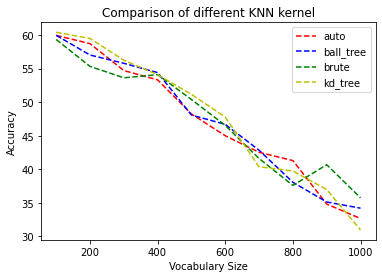

In [6]:
#KNN KERNAL
f = open("10ClassLog/KNN_auto.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
K_auto_accu = []
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        K_auto_accu.append(float(s[0]))
    line = f.readline()
f.close()

f = open("10ClassLog/KNN_ball_tree.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
K_ball_tree = []
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        K_ball_tree.append(float(s[0]))
    line = f.readline()
f.close()

f = open("10ClassLog/KNN_brute.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
K_brute = []
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        K_brute.append(float(s[0]))
    line = f.readline()
f.close()

f = open("10ClassLog/KNN_kd_tree.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
K_kd_tree = []
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        K_kd_tree.append(float(s[0]))
    line = f.readline()
f.close()

vocabulary_size = [100,200,300,400,500,600,700,800,900,1000]
plt.plot(vocabulary_size,K_auto_accu,color='r',ls='--',label='auto')
plt.plot(vocabulary_size,K_ball_tree,color='b',ls='--',label='ball_tree')
plt.plot(vocabulary_size,K_brute,color='g',ls='--',label='brute')
plt.plot(vocabulary_size,K_kd_tree,color='y',ls='--',label='kd_tree')
#plt.plot(x1,y1,'ro-',x2,y2,'g+-',x3,y3,'b^-')
plt.title('Comparison of different KNN kernel')
plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

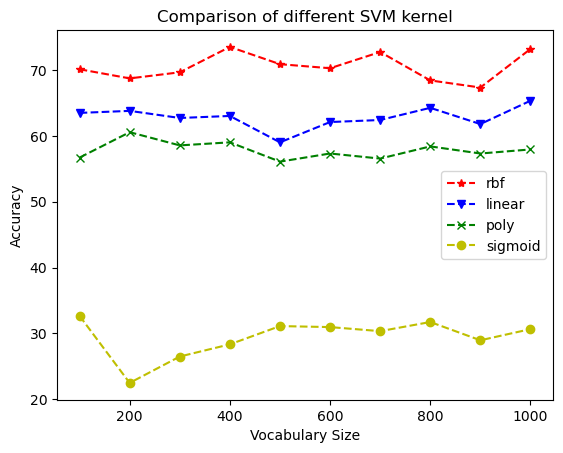

In [18]:
#SVM KERNAL
f = open("10ClassLog/SVM.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
SVM_rbf = []
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        SVM_rbf.append(float(s[0]))
    line = f.readline()
f.close()

f = open("10ClassLog/SVM_linear.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
SVM_linear = []
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        SVM_linear.append(float(s[0]))
    line = f.readline()
f.close()

f = open("10ClassLog/SVM_poly.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
SVM_poly = []
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        SVM_poly.append(float(s[0]))
    line = f.readline()
f.close()

f = open("10ClassLog/SVM_sigmoid.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
SVM_sigmoid = []
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        SVM_sigmoid.append(float(s[0]))
    line = f.readline()
f.close()

vocabulary_size = [100,200,300,400,500,600,700,800,900,1000]
plt.plot(vocabulary_size,SVM_rbf,'r--',marker='*',label='rbf')
plt.plot(vocabulary_size,SVM_linear,'b--',marker='v',label='linear')
plt.plot(vocabulary_size,SVM_poly,'g--',marker='x',label='poly')
plt.plot(vocabulary_size,SVM_sigmoid,'y--',marker='o',label='sigmoid')
#plt.plot(x1,y1,'ro-',x2,y2,'g+-',x3,y3,'b^-')
plt.title('Comparison of different SVM kernel')
plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

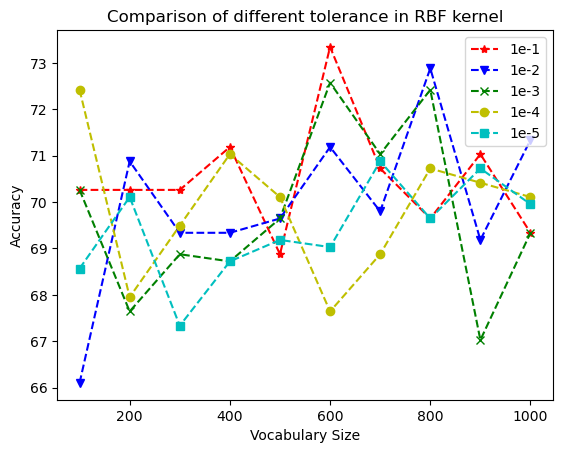

In [37]:
#SVM rbf
f = open("10ClassLog/SVM_tolerance.txt")
line = f.readline()
pattern = re.compile(r'(?<=Accuracy = )\d+\.?\d*')
SVM_accu = []
tol = [1e-1,1e-2,1e-3,1e-4,1e-5]
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        SVM_accu.append(float(s[0]))
    line = f.readline()
f.close()

vocabulary_size = [100,200,300,400,500,600,700,800,900,1000]
plt.plot(vocabulary_size,SVM_accu[0:10],'r--',marker='*',label='1e-1')
plt.plot(vocabulary_size,SVM_accu[10:20],'b--',marker='v',label='1e-2')
plt.plot(vocabulary_size,SVM_accu[20:30],'g--',marker='x',label='1e-3')
plt.plot(vocabulary_size,SVM_accu[30:40],'y--',marker='o',label='1e-4')
plt.plot(vocabulary_size,SVM_accu[40:50],'c--',marker='s',label='1e-5')
#plt.plot(x1,y1,'ro-',x2,y2,'g+-',x3,y3,'b^-')
plt.title('Comparison of different tolerance in RBF kernel')
plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(46.25, 0.5, 'True Label')

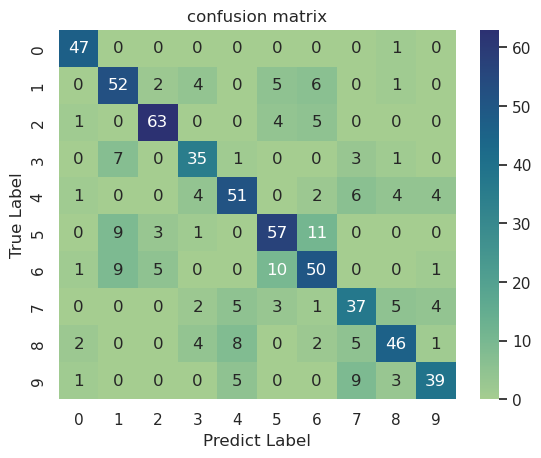

In [44]:
#confu_matrix
confu_matrix = np.array([[47,  0,  0,  0,  0,  0,  0,  0,  1,  0],
                         [ 0, 52,  2,  4,  0,  5,  6,  0,  1,  0],
                         [ 1,  0, 63,  0,  0,  4,  5,  0,  0,  0],
                         [ 0,  7,  0, 35,  1,  0,  0,  3,  1,  0],
                         [ 1,  0,  0,  4, 51,  0,  2,  6,  4,  4],
                         [ 0,  9,  3,  1,  0, 57, 11,  0,  0,  0],
                         [ 1,  9,  5,  0,  0, 10, 50,  0,  0,  1],
                         [ 0,  0,  0,  2,  5,  3,  1, 37,  5,  4],
                         [ 2,  0,  0,  4,  8,  0,  2,  5, 46,  1],
                         [ 1,  0,  0,  0,  5,  0,  0,  9,  3, 39]])
sns.set()
f,ax=plt.subplots()
sns.heatmap(confu_matrix,annot=True,ax=ax,cmap="crest") #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('Predict Label') #x轴
ax.set_ylabel('True Label') #y轴

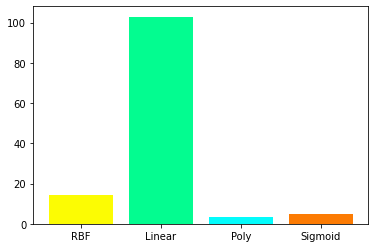

In [67]:
#Time
#SVM rbf
f = open("10ClassLog/SVM.txt")
line = f.readline()
pattern = re.compile(r'(?<=taken = )\d+\.?\d*')
RBF_time_taken = 0
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        RBF_time_taken = RBF_time_taken + float(s[0])
    line = f.readline()
f.close()

f = open("10ClassLog/SVM_linear.txt")
line = f.readline()
pattern = re.compile(r'(?<=taken = )\d+\.?\d*')
Linear_time_taken = 0
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        Linear_time_taken = Linear_time_taken + float(s[0])
    line = f.readline()
f.close()

f = open("10ClassLog/SVM_poly.txt")
line = f.readline()
pattern = re.compile(r'(?<=taken = )\d+\.?\d*')
Poly_time_taken = 0
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        Poly_time_taken = Poly_time_taken + float(s[0])
    line = f.readline()
f.close()

f = open("10ClassLog/SVM_sigmoid.txt")
line = f.readline()
pattern = re.compile(r'(?<=taken = )\d+\.?\d*')
Sigmoid_time_taken = 0
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        Sigmoid_time_taken = Sigmoid_time_taken + float(s[0])
    line = f.readline()
f.close()

name_list = ['RBF','Linear','Poly','Sigmoid']
num_list = [RBF_time_taken,Linear_time_taken,Poly_time_taken,Sigmoid_time_taken]
plt.bar(range(len(num_list)), num_list,tick_label=name_list,color=['#fcfc03', '#03fc90', '#03fcfc','#fc7b03'])
plt.show()



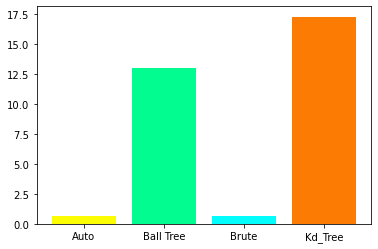

In [68]:
f = open("10ClassLog/KNN_auto.txt")
line = f.readline()
pattern = re.compile(r'(?<=taken = )\d+\.?\d*')
KNN_auto_time_taken = 0
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        KNN_auto_time_taken = KNN_auto_time_taken + float(s[0])
    line = f.readline()
f.close()

f = open("10ClassLog/KNN_ball_tree.txt")
line = f.readline()
pattern = re.compile(r'(?<=taken = )\d+\.?\d*')
KNN_ball_tree_time_taken = 0
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        KNN_ball_tree_time_taken = KNN_ball_tree_time_taken + float(s[0])
    line = f.readline()
f.close()

f = open("10ClassLog/KNN_brute.txt")
line = f.readline()
pattern = re.compile(r'(?<=taken = )\d+\.?\d*')
KNN_brute_time_taken = 0
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        KNN_brute_time_taken = KNN_brute_time_taken + float(s[0])
    line = f.readline()
f.close()

f = open("10ClassLog/KNN_kd_tree.txt")
line = f.readline()
pattern = re.compile(r'(?<=taken = )\d+\.?\d*')
KNN_kd_tree_time_taken = 0
while line:
    s = pattern.findall(line)
    if s:
        #print(s[0])
        KNN_kd_tree_time_taken = KNN_kd_tree_time_taken + float(s[0])
    line = f.readline()
f.close()

name_list = ['Auto','Ball Tree','Brute','Kd_Tree']
num_list = [KNN_auto_time_taken,KNN_ball_tree_time_taken,KNN_brute_time_taken,KNN_kd_tree_time_taken]
plt.bar(range(len(num_list)), num_list,tick_label=name_list,color=['#fcfc03', '#03fc90', '#03fcfc','#fc7b03'])
plt.show()